## Combine results

This file will combine the results of the 3 different classifers. It first combines all the three different dataframes with their columns. It will make some graphs according to the classified data, those graphs will be analysed in `chapter 6` of the assignment document. 

In [1]:
# Helpers. 
import numpy as np # For generating random probabilities to split into train-test dataset
import pandas as pandas # For loading data
from sklearn import preprocessing

import matplotlib.pyplot as plt # Matplotlib for barcharts.

%matplotlib inline

In [2]:
def displayBarChart(column):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  column.value_counts().plot(kind = 'bar', color = '#12f12f', alpha = 0.5, grid = True)
  plt.ylabel('counts')
  plt.title('Distribution of label category')
  plt.xticks(rotation = 'horizontal')
  ax.xaxis.grid(which = "major")
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals = 2), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center')

## Data cleaning

Read all the model results and the unlabled dataset to combine everything togehter and analyse the data.

In [3]:
df_base = pandas.read_csv("data/input/unlabelledDataset.csv")
df_model_1 = pandas.read_csv("data/output/model-1-results.csv")
df_model_2 = pandas.read_csv("data/output/model-2-results.csv")
df_model_3 = pandas.read_csv("data/output/model-3-results.csv")

In [4]:
df_base = df_base.loc[:, ['app_name', 'user_id', 'date', 'country', 'version', 'score']]

df_model_1 = df_model_1.rename(columns={'labels': 'category'}) # Rename columns.
df_model_1 = df_model_1.loc[:, ['category']] # Only select the categories columns.

df_model_2 = df_model_2.rename(columns={'labels': 'requirement'}) # Rename columns.
df_model_2 = df_model_2.loc[:, ['requirement']] # Only select the categories columns.
df_model_3 = df_model_3.rename(columns={'labels': 'sentiment', 'reviews': 'review'}) # Rename columns.

df = pandas.concat([df_base, df_model_1, df_model_2, df_model_3], axis=1, sort=False)

## Result visualizations

Below you'll find some visualizations of the results. 
All those results are analyzed in `chapter 6`. 

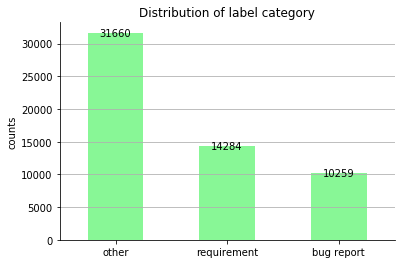

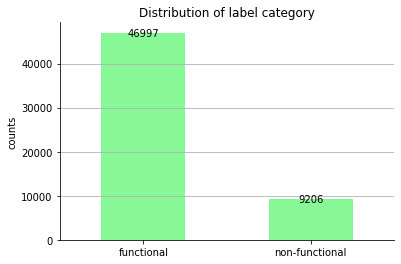

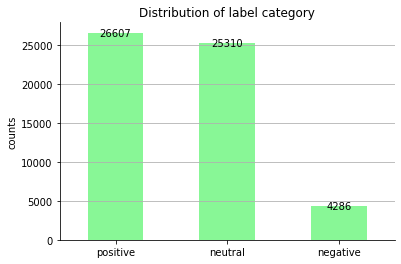

In [5]:
displayBarChart(df['category'])
displayBarChart(df['requirement'])
displayBarChart(df['sentiment'])

In [6]:
def displayStackedBarChart(column):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    g = column.unstack(level=1)
    g = g.fillna(0)

    
    plt.bar(g.index.values, g['negative'], bottom=None, color='red', label='Negative')
    plt.bar(g.index.values, g['neutral'], bottom=g['negative'], color='grey', label='Neutral')
    plt.bar(g.index.values, g['positive'], bottom=g['neutral'], color='green', label='Positive')
    
    plt.legend()
    plt.title('Distribution of sentiment per country')
    plt.xlabel('Country')
    plt.ylabel('Count of senitment')

def startChart(column):
    g = column.unstack(level=1)
    g = g.fillna(0)
    g.plot.bar(stacked=True)
    plt.xticks(rotation = 'horizontal')
    plt.ylabel('counts')
    plt.title('Distribution of sentiment per score rating')
    plt.xlabel('Amount of stars')
    plt.ylabel('Amount of reviews')
    
def categorySentimentBar(column):
    g = column.unstack(level=1)
    g = g.fillna(0)
    print(g)
    g.plot.bar(stacked=True)
    plt.xticks(rotation = 'horizontal')
    plt.ylabel('counts')
    plt.title('Distribution of sentiment per category')
    plt.xlabel('Category')
    plt.ylabel('Amount of reviews')


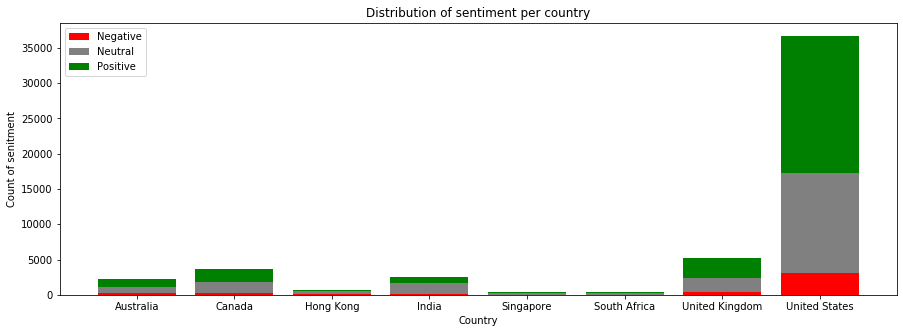

In [7]:
g = df.groupby(['country', 'sentiment'])['review'].count()
displayStackedBarChart(g)

#plot alle bug en requirements per versie, om te kijken of het aantal nieuwe bugs afneemt per versie.

## Relation between stars and sentiment

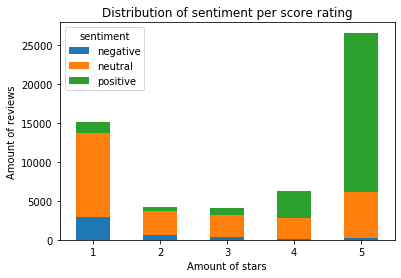

In [8]:
g = df.groupby(['score', 'sentiment'])['review'].count()
startChart(g)

sentiment    negative  neutral  positive
category                                
bug report       1021     8293       945
other             961     8201     22498
requirement      2304     8816      3164


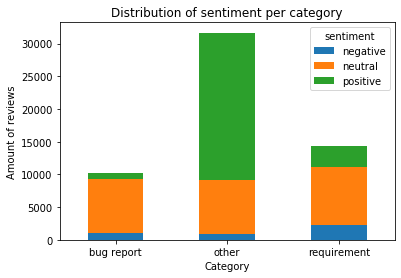

In [9]:
g = df.groupby(['category', 'sentiment'])['review'].count()
categorySentimentBar(g)

category                      bug report  other  requirement
app_name                                                    
Calorie Counter MyFitnessPal          82   2593          512
Facebook                            4607   3898         3337
Fitbit                               314   1194          212
Instagram                           3797  10121         5366
Pinterest                            385   2946         1954
Waze                                 298   9295         2225
Whatsapp                             776   1613          678


Text(0, 0.5, 'Amount of reviews')

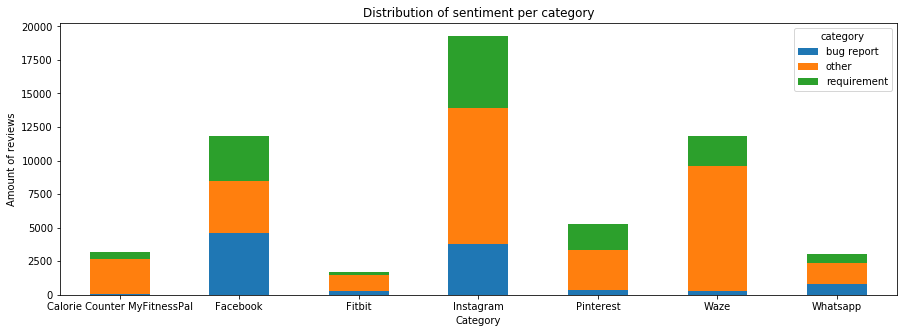

In [10]:
g = df.groupby(['app_name', 'category'])['review'].count()
g = g.unstack(level=1)
g = g.fillna(0)

print(g)

g.plot.bar(stacked=True, figsize=(15,5))
plt.xticks(rotation = 'horizontal')
plt.ylabel('counts')
plt.title('Distribution of sentiment per category')
plt.xlabel('Category')
plt.ylabel('Amount of reviews')

<Figure size 432x288 with 0 Axes>

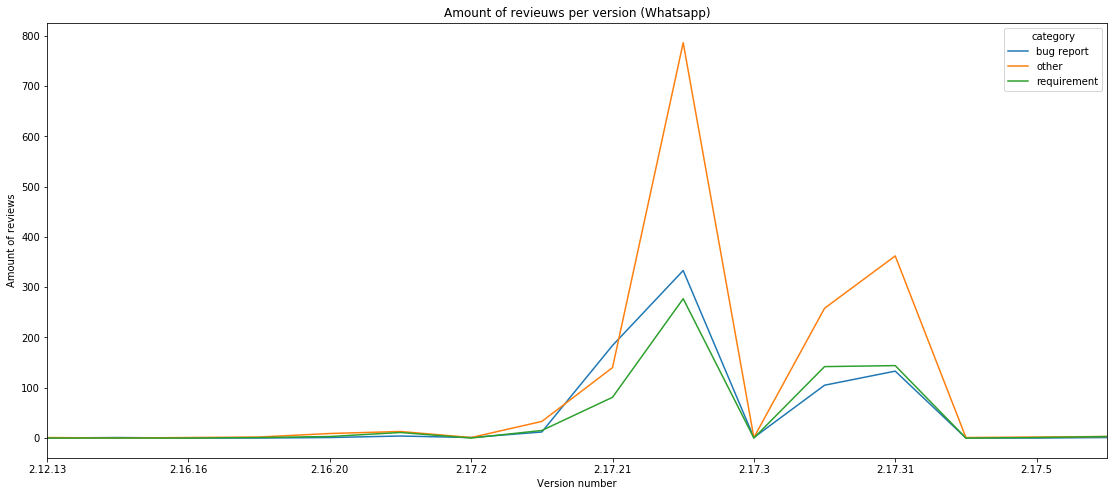

<Figure size 432x288 with 0 Axes>

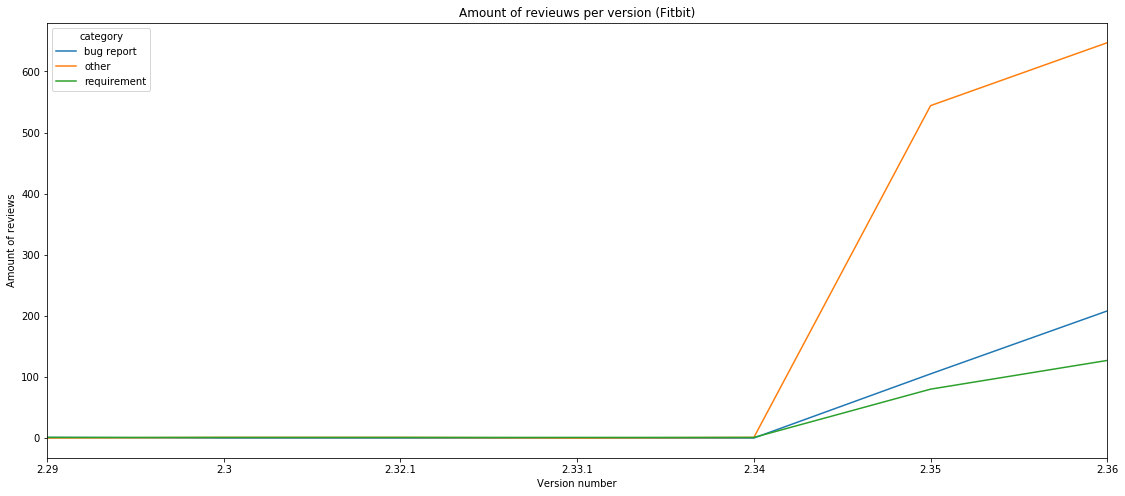

<Figure size 432x288 with 0 Axes>

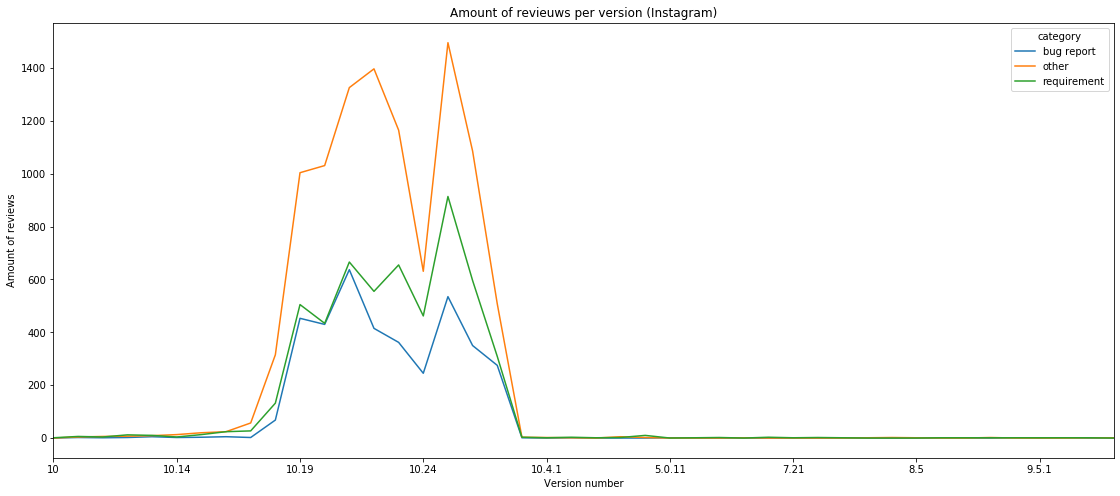

<Figure size 432x288 with 0 Axes>

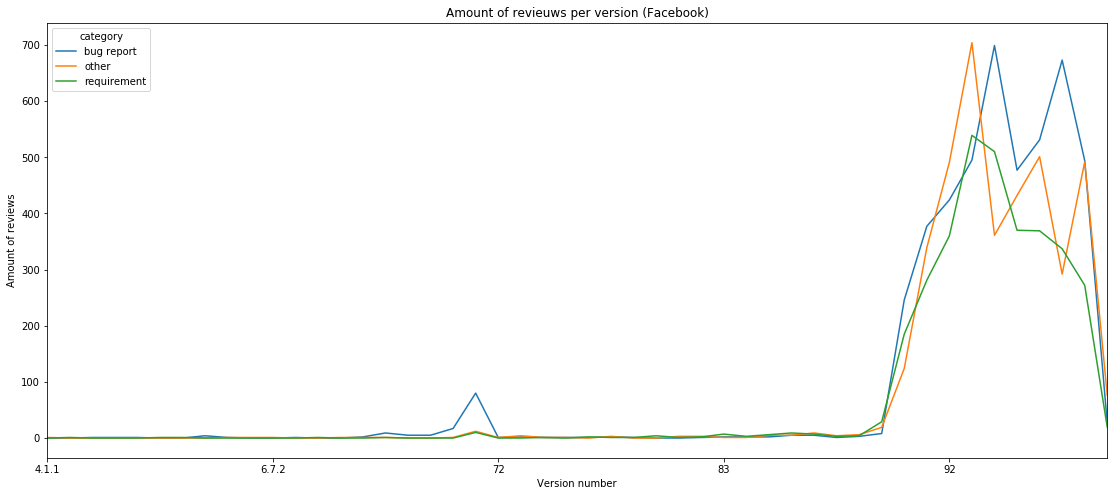

<Figure size 432x288 with 0 Axes>

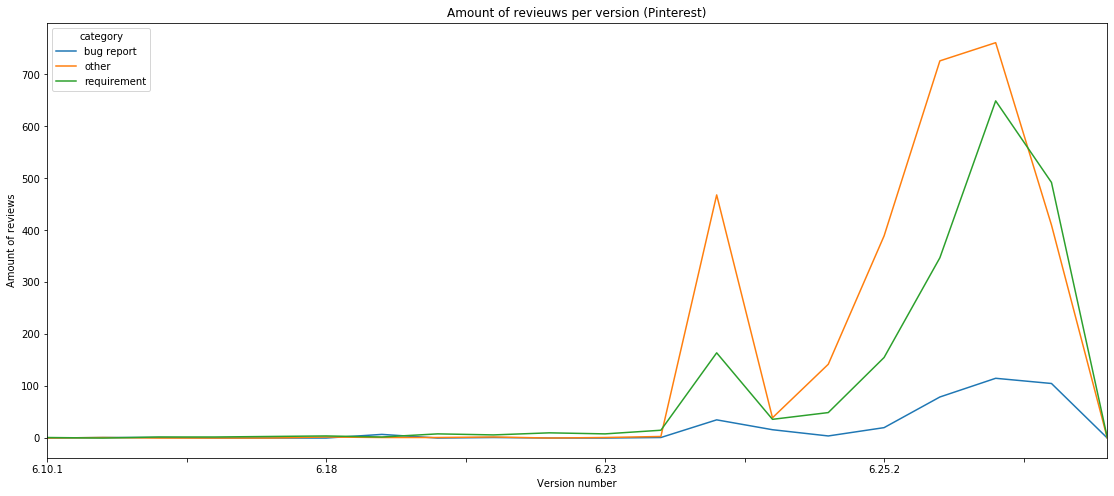

<Figure size 432x288 with 0 Axes>

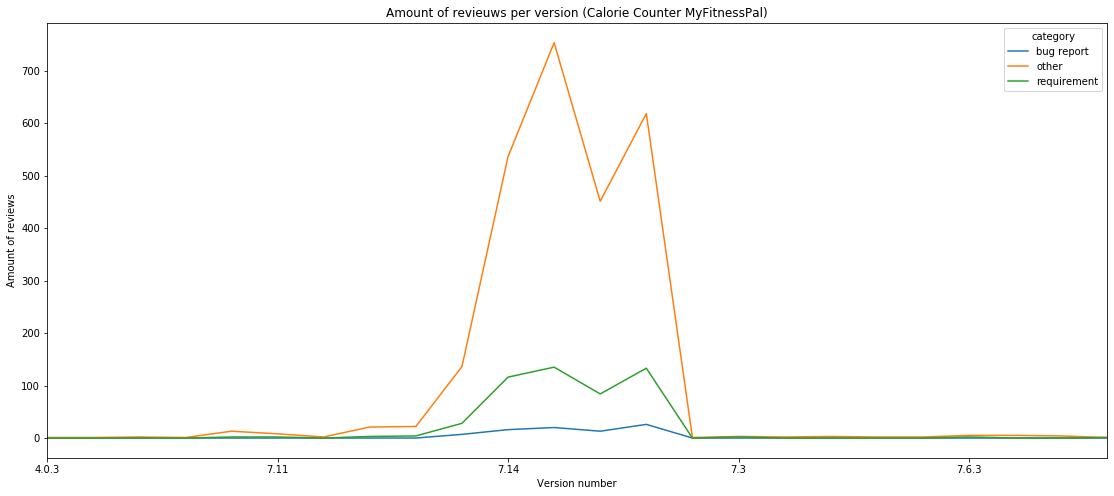

<Figure size 432x288 with 0 Axes>

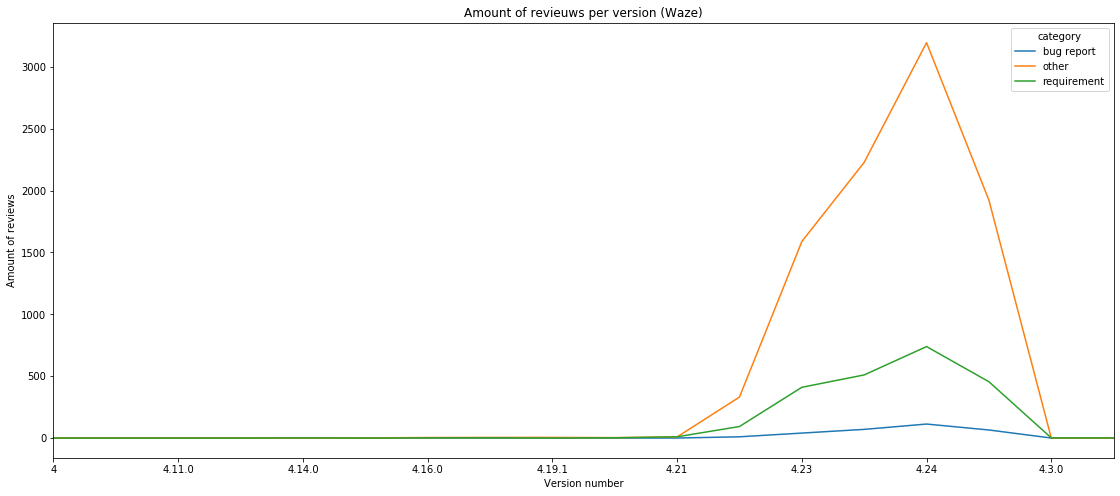

In [11]:
g = df.groupby(['app_name', 'version', 'category'])['review'].count()

app_names = set()

for a in g.index.values.tolist():
    app_names.add(a[0])


for app in list(app_names):
    b = g[app].unstack(level=['category'], fill_value=0)
    plt.figure()
    b = b.fillna(0)
    b.plot.line(figsize=(19,8))
    plt.xticks(rotation = 'horizontal')
    plt.ylabel('counts')
    plt.title('Amount of revieuws per version (' + app + ')')
    plt.xlabel('Version number')
    plt.ylabel('Amount of reviews')


In [12]:
# Write result to csv file.
df.to_csv('data/output/models-results.csv', index = False)